1. Load the Heart Disease Dataset and Perform EDA

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    

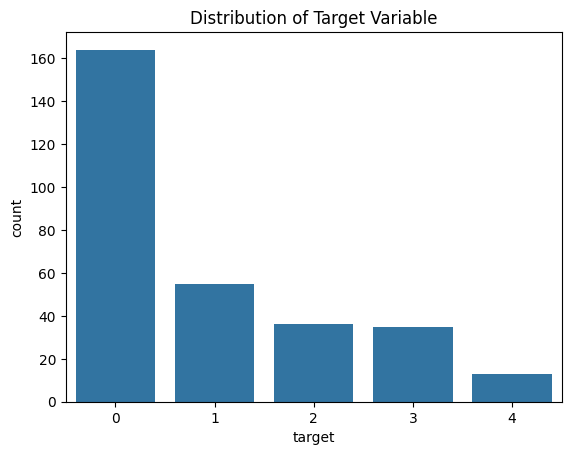

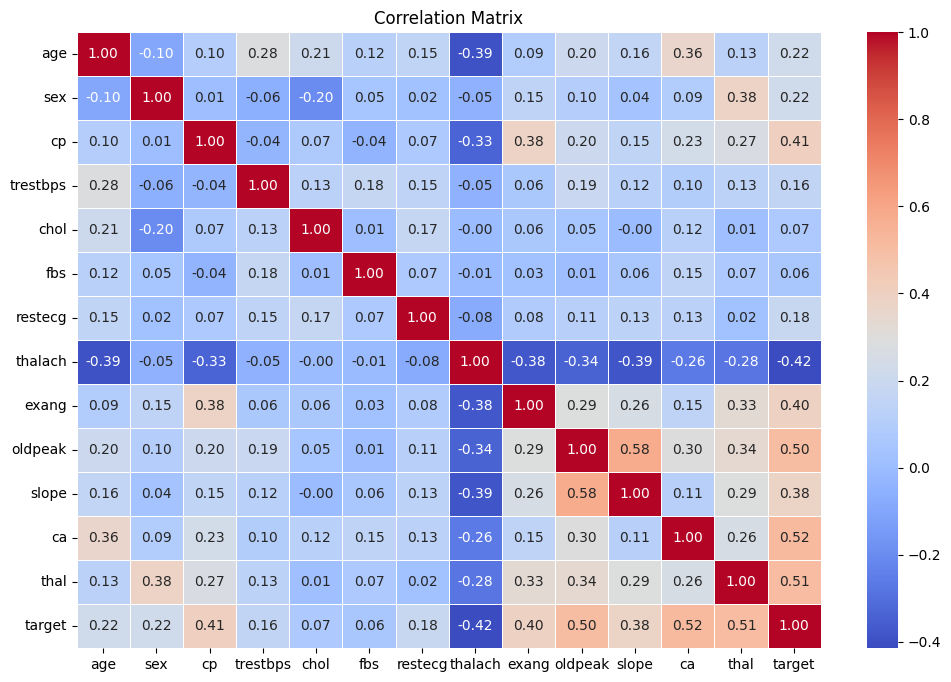

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the heart disease dataset (assuming you have fetched it)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=columns, na_values='?')

# Display first few rows and summary statistics
print(df.head())
print(df.describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Visualize distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


2. Preprocess the Dataset

In [28]:
# Handle missing values (drop rows with missing data)
df.dropna(inplace=True)

# Encode categorical variables (if any)
# No categorical variables in this dataset that need encoding

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))


3. Apply Clustering Algorithms

In [29]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters_agg = agg_clustering.fit_predict(X_scaled)


In [32]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)


4. Visualize Clusters Using PCA and t-SNE


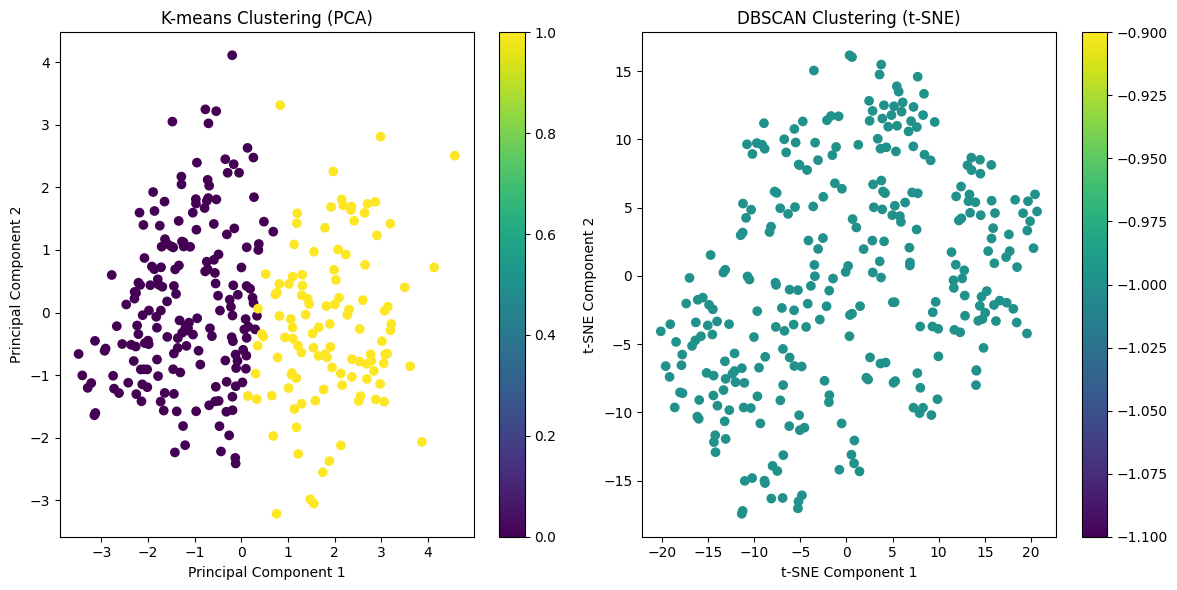

In [31]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting K-means clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

# Plotting DBSCAN clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()


5. Use Gaussian Mixture Models (GMMs)

In [33]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled)



6. Evaluate Clustering Performance



In [35]:
# Evaluate K-means clustering performance
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, clusters_kmeans)
print(f'K-means:')
print(f'  Silhouette Score: {silhouette_kmeans:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}')

# Evaluate Hierarchical clustering performance
silhouette_agg = silhouette_score(X_scaled, clusters_agg)
davies_bouldin_agg = davies_bouldin_score(X_scaled, clusters_agg)
print(f'Hierarchical:')
print(f'  Silhouette Score: {silhouette_agg:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_agg:.2f}')

# Evaluate DBSCAN clustering performance (only if more than one cluster is formed)
unique_clusters_dbscan = np.unique(clusters_dbscan)
if len(unique_clusters_dbscan) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, clusters_dbscan)
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled, clusters_dbscan)
    print(f'DBSCAN:')
    print(f'  Silhouette Score: {silhouette_dbscan:.2f}')
    print(f'  Davies-Bouldin Index: {davies_bouldin_dbscan:.2f}')
else:
    print('DBSCAN did not identify multiple clusters.')

# Evaluate GMM clustering performance
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, clusters_gmm)
print(f'Gaussian Mixture Model:')
print(f'  Silhouette Score: {silhouette_gmm:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_gmm:.2f}')


K-means:
  Silhouette Score: 0.18
  Davies-Bouldin Index: 2.08
Hierarchical:
  Silhouette Score: 0.13
  Davies-Bouldin Index: 2.60
DBSCAN did not identify multiple clusters.
Gaussian Mixture Model:
  Silhouette Score: 0.16
  Davies-Bouldin Index: 2.23


7. Compare Clustering Algorithms and Choose the Best

In [36]:
# Evaluate K-means clustering performance
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, clusters_kmeans)
print(f'K-means:')
print(f'  Silhouette Score: {silhouette_kmeans:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}')

# Evaluate Hierarchical clustering performance
silhouette_agg = silhouette_score(X_scaled, clusters_agg)
davies_bouldin_agg = davies_bouldin_score(X_scaled, clusters_agg)
print(f'Hierarchical:')
print(f'  Silhouette Score: {silhouette_agg:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_agg:.2f}')

# Evaluate DBSCAN clustering performance (only if more than one cluster is formed)
unique_clusters_dbscan = np.unique(clusters_dbscan)
if len(unique_clusters_dbscan) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, clusters_dbscan)
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled, clusters_dbscan)
    print(f'DBSCAN:')
    print(f'  Silhouette Score: {silhouette_dbscan:.2f}')
    print(f'  Davies-Bouldin Index: {davies_bouldin_dbscan:.2f}')
else:
    print('DBSCAN did not identify multiple clusters.')

# Evaluate GMM clustering performance
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, clusters_gmm)
print(f'Gaussian Mixture Model:')
print(f'  Silhouette Score: {silhouette_gmm:.2f}')
print(f'  Davies-Bouldin Index: {davies_bouldin_gmm:.2f}')

# Compare performance and choose the best algorithm
# Note: Choose based on the clustering goal (e.g., highest silhouette score, lowest Davies-Bouldin index)
# Here's a simple comparison based on silhouette score:
best_algorithm = None
best_score = -1

if silhouette_kmeans > best_score:
    best_algorithm = "K-means"
    best_score = silhouette_kmeans

if silhouette_agg > best_score:
    best_algorithm = "Hierarchical"
    best_score = silhouette_agg

if len(unique_clusters_dbscan) > 1 and silhouette_dbscan > best_score:
    best_algorithm = "DBSCAN"
    best_score = silhouette_dbscan

if silhouette_gmm > best_score:
    best_algorithm = "Gaussian Mixture Model"
    best_score = silhouette_gmm

print(f'\nBest Clustering Algorithm: {best_algorithm} with Silhouette Score: {best_score:.2f}')


K-means:
  Silhouette Score: 0.18
  Davies-Bouldin Index: 2.08
Hierarchical:
  Silhouette Score: 0.13
  Davies-Bouldin Index: 2.60
DBSCAN did not identify multiple clusters.
Gaussian Mixture Model:
  Silhouette Score: 0.16
  Davies-Bouldin Index: 2.23

Best Clustering Algorithm: K-means with Silhouette Score: 0.18
